In [ ]:
!pip install opencv-python
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from glob import glob
from PIL import Image
from numpy import asarray

In [ ]:
dirct ='D:/code/Brain-Tumor-Detection'

In [18]:
import os
path = os.listdir(dirct+'/Brain Tumor Data')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [19]:
no_tumor_frompath= dirct+'/Brain Tumor Data/Training/no_tumor'
no_tumor_topath = dirct+'/Brain Tumor Data/Agumented_Data/Training/no_tumor/'
no_tumor_images=glob(no_tumor_frompath+'/*')
c=0
for path in no_tumor_images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1

OSError: cannot write mode RGBA as JPEG

In [21]:
from PIL import Image
from glob import glob

no_tumor_frompath = dirct + '/Brain Tumor Data/Training/no_tumor'
no_tumor_topath = dirct + '/Brain Tumor Data/Agumented_Data/Training/no_tumor/'
no_tumor_images = glob(no_tumor_frompath + '/*')
c = 0
for path in no_tumor_images:
    img = Image.open(path)
    img = img.resize((224,224))
    # Convert RGBA or P mode to RGB
    if img.mode == 'RGBA' or img.mode == 'P':
        img = img.convert('RGB')
    img.save(no_tumor_topath + str(c) + '.jpg')
    c += 1
    mirimg = img.transpose(Image.FLIP_LEFT_RIGHT)
    mirimg.save(no_tumor_topath + str(c) + '.jpg')
    c += 1
    rotimg = img.rotate(90, Image.NEAREST, expand = 1)
    rotimg.save(no_tumor_topath + str(c) + '.jpg')
    c += 1
    mirrotimg = rotimg.transpose(Image.FLIP_LEFT_RIGHT)
    mirrotimg.save(no_tumor_topath + str(c) + '.jpg')
    c += 1


In [22]:
frompath = dirct+'Brain Tumor Data/Training/pituitary_tumor'
topath = dirct+'Brain Tumor Data/Agumented_Data/Training/pituitary_tumor/'
images=glob(frompath+'/*')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(topath+str(c)+'.jpg')
  c+=1

In [23]:
import cv2
X=[]
Y=[]
for cls in classes:
  pth = dirct+'/Brain Tumor Data/Agumented_Data/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j)   
    img = cv2.resize(img,dsize=(224,224))
    X.append(img)
    Y.append(classes[cls])

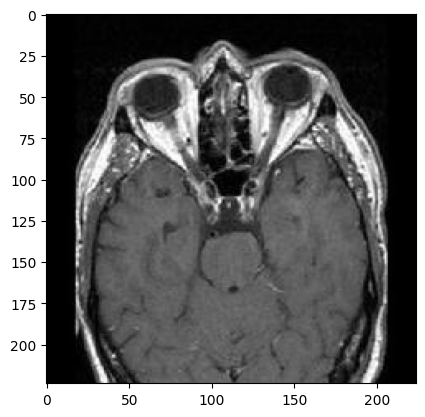

In [24]:
plt.imshow(X[0],cmap='gray')

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)
print ("Shape of an image in x_train: ", x_train[0].shape)
print ("Shape of an image in x_test: ", x_test[0].shape)

Shape of an image in x_train:  (224, 224, 3)
Shape of an image in x_test:  (224, 224, 3)


In [26]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
x_train = np.array(x_train)
y_test = np.array(y_test)
x_test = np.array(x_test) 
print("x_train Shape: ", x_train.shape) 
print("x_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape:  (15910, 224, 224, 3)
x_test Shape:  (3978, 224, 224, 3)
y_train Shape:  (15910, 2)
y_test Shape:  (3978, 2)


In [27]:
from keras.applications import vgg16

img_rows,img_cols=224,224

vgg=vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows,img_cols,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [28]:
for layer in vgg.layers:
  layer.trainable=False


In [29]:
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
def lw(bottom_model,num_classes):
  top_model=bottom_model.output
  top_model=GlobalAveragePooling2D()(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(512,activation='relu')(top_model)
  top_model=Dense(num_classes,activation='softmax')(top_model)
  return top_model

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.models import Model

In [31]:
import tempfile

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__


In [32]:
make_keras_picklable()

In [33]:
num_classes=2
FC_Head=lw(vgg,num_classes)
model=Model(inputs=vgg.input,outputs=FC_Head)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [34]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),verbose=1,initial_epoch=0)

Epoch 1/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1079s 2s/step - accuracy: 0.8563 - loss: 0.8407 - val_accuracy: 0.9643 - val_loss: 0.1034
Epoch 2/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1152s 2s/step - accuracy: 0.9740 - loss: 0.0739 - val_accuracy: 0.9794 - val_loss: 0.0650
Epoch 3/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 1087s 2s/step - accuracy: 0.9858 - loss: 0.0407 - val_accuracy: 0.9691 - val_loss: 0.0917
Epoch 4/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 846s 2s/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9862 - val_loss: 0.0403
Epoch 5/5
498/498 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9796 - val_loss: 0.0935


In [46]:
import pickle
filename= 'brain_tumor_model.pkl'


In [54]:
save_model = 'braintumor.h5'
model.save('my_model.keras')
pickle.dump(model,open(filename,'wb'))

TypeError: 'str' object is not callable

In [55]:
load_model = pickle.load(open(filename,'rb'))
load_model.predict(rand(x_test))

EOFError: Ran out of input

In [56]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

ValueError: The filename must end in `.weights.h5`. Received: filepath=model.h5

In [57]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
loaded_model.predict(x_test)

In [ ]:
dec= {0: 'No Tumor', 1:'Positive Tumor'}

In [ ]:
plt.figure(figsize=(18,12))
p=os.listdir(path+'Brain Tumor Data/Training/pituitary_tumor')
c=1
predict_img=[]
for i in os.listdir(path+'Brain Tumor Data/Training/pituitary_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread(path+'Brain Tumor Data/Training/pituitary_tumor/'+i)
  img1 = cv2.resize(img,(224,224))
  predict_img.append(img1)
  p= load_model.predict(np.array(predict_img))
  result = np.argmax(p, axis =1)
  plt.title(dec[result[c-1]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

In [ ]:
plt.figure(figsize=(18,12))
p=os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor')
c=1
predict_img=[]
for i in os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor/'+i)
  img1 = cv2.resize(img,(224,224))
  predict_img.append(img1)
  p= model.predict(np.array(predict_img))
  result = np.argmax(p, axis =1)
  plt.title(dec[result[c-1]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1